In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from tqdm import tqdm
import itertools
import random
#import warnings
#warnings.filterwarnings('ignore')

#### Import datasets

RPU

In [2]:
gates = ['e11x32STPhoRadA', 'e15x32NpuSspS2', 'e16x33NrdA2', 'e20x32gp411', 'e32x30SspGyrB', 'e34x30MjaKlbA',
         'e38x32gp418', 'e41x32NrdJ1', 'e42x32STIMPDH1']

In [3]:
hill_params = {
    'e11x32STPhoRadA': [1.87947058e-01, 1.42981978e+02, 4.00000000e+00, 1.20604405e+00, 3.35441402e-33, 7.18114435e-05, 7.28346285e+00, 7.28346285e+00],
    'e15x32NpuSspS2': [2.22191566e-01, 1.64021408e+01, 3.17092459e+00, 4.00000000e+00, 4.71903773e-04, 4.71903773e-04, 9.79931266e-01, 9.79931266e-01],
    'e16x33NrdA2': [2.41448864e-01, 2.98210618e+01, 4.00000000e+00, 4.00000000e+00, 1.22716190e-28, 2.15121587e-03, 6.48203170e+00, 6.48203170e+00],
    'e20x32gp411': [3.06886383e-01, 1.51079177e+01, 2.86700955e+00, 7.09792637e-01, 2.21927034e-33, 1.21149942e-14, 2.20960687e+00, 2.24257299e+00],
    'e32x30SspGyrB': [2.60546912e-01, 2.94621122e+01, 3.20198791e+00, 4.00000000e+00, 4.14075104e-16, 4.74372487e-03, 5.50780393e+00, 5.50780393e+00],
    'e34x30MjaKlbA': [1.91390868e-01, 2.61109599e+01, 3.54540088e+00, 4.00000000e+00, 1.17058895e-02, 7.94584792e-30, 3.13403244e+00, 3.13403244e+00],
    'e38x32gp418': [1.87714265e-01, 4.80916192e+01, 4.00000000e+00, 9.25732586e-01, 1.18764031e-02, 8.94050919e-03, 2.11496375e+00, 2.11496375e+00],
    'e41x32NrdJ1': [2.26785525e-01, 2.54492716e+01, 3.87696429e+00, 4.00000000e+00, 8.39060170e-03, 1.70487281e-22, 3.22625576e+00, 3.22625576e+00],
    'e42x32STIMPDH1': [2.54897279e-01, 2.38195348e+01, 4.00000000e+00, 3.98508826e+00, 6.41543918e-33, 3.23950280e-03, 2.56742130e+00, 2.56742130e+00]
}

Interval-estimate.

In [ ]:
hill_params = {
    'e11x32STPhoRadA': [7.645346632875684, 3.6278561616938205, 9.2171235388524, 1.1001985686622204, 14.8593116571963, 5.743762670085866, 458.5136836256326, 360.3202790463802],
    'e15x32NpuSspS2': [10.427864870911893, 9.059619137810259, 2.2173651514145054, 0.8959265079247906, 38.20872424607038, 26.812977822048122, 171.8535154764809, 149.69297721244843],
    'e16x33NrdA2': [9.991312723754868, 6.5897949388608605, 4.998239806913596, 1.2397846739565033, 7.416887642587476, 15.220098324908523, 196.10124234936688, 756.8276701181695],
    'e20x32gp411': [14.070212065863386, 0.7915636408282356, 2.0945754070850655, 1.0928383754262643, 10.826010849280056, 11.452710743807668, 511.61206006462345, 205.14895215235003],
    'e32x30SspGyrB': [10.653207289112212, 8.478594476251368, 3.11756946790781, 1.0683764045459927, 16.72019154901677, 9.778231993280107, 405.3316974141839, 289.8767336384693],
    'e34x30MjaKlbA': [1374.6349039619042, 12.144747077620854, 0.7451430715403362, 5.146751203285993, 11.715294696653377, 66.35185714414995, 1201.9421334190895, 805.9118807569571],
    'e38x32gp418': [7.395490239623599, 1.5509958154810697, 5.670357037879099, 1.3597918973710645, 19.06629063316735, 27.75559921258502, 163.83497173432002, 291.32238950469014],
    'e41x32NrdJ1': [9.79737497627455, 16.568623568277534, 3.407741906734099, 0.7844447687490096, 23.59776411698231, 13.14939309181156, 322.7098655707045, 264.1390343569163],
    'e42x32STIMPDH1': [10.336009368125339, 6.000475416768916, 4.477739982311845, 0.9757489564383387, 18.905781228897766, 21.953530170906987, 187.57210700503205, 278.66102832941397]
}
gate_params = {
    'e11x32STPhoRadA': [0.016119, 147.066713, 0.013177, 0.01],
    'e15x32NpuSspS2': [0.056225, 0.012144, 0.011197, 0.01],
    'e16x33NrdA2': [0.050964, 0.164080, 0.012668, 0.01],
    'e20x32gp411': [0.056090, 0.050514, 0.011701, 0.01],
    'e32x30SspGyrB': [0.059446, 0.046058, 0.013620, 0.01],
    'e34x30MjaKlbA': [0.035649, 16.158448, 0.015069, 0.01],
    'e38x32gp418': [0.051217, 0.121835, 0.011341, 0.01],
    'e41x32NrdJ1': [0.046434, 2.774168, 0.011096, 0.01],
    'e42x32STIMPDH1': [0.048353, 0.014531, 0.013498, 0.01]
}

In [4]:
fluos = pd.read_csv('datasets/induction_matrix_and/fluos.csv', index_col='time')
ods = pd.read_csv('datasets/induction_matrix_and/ods.csv', index_col='time')
#gates = ['e11x32STPhoRadA', 'e15x32NpuSspS2', 'e16x33NrdA2', 'e20x32gp411', 'e32x30SspGyrB',
#         'e34x30MjaKlbA', 'e38x32gp418', 'e41x32NrdJ1', 'e42x32STIMPDH1']
controls = ['positive_control', 'negative_control']
cumas = [0, 6.25, 12.5, 25, 50, 100]
aras = [0, 0.8125, 3.25, 13, 52, 208]
#cumas_rpu = [0.04, 2.09, 4.0, 5.7, 7.23, 8.26]
#aras_rpu = [0.02, 0.67, 1.79, 6.09, 12.39, 12.57]

cumas_rpu = [5.160308727625551e-22, 0.1503530957891216, 0.30298032564481925, 0.5678111055145855, 0.9488899036690079, 1.371938809116961]
aras_rpu = [0.018662727197652017, 3.178003346532333, 12.947615590104748, 16.501814366047896, 16.823954625777105, 16.846887772258317]

#idx = 30
#gfp = fluos[filter(lambda x: x.startswith('positive_control_4AE'), fluos.columns)].mean(axis=1)
#neg = fluos[filter(lambda x: x.startswith('negative_control_4AE'), fluos.columns)].mean(axis=1)
#fluos_rpu = np.abs(fluos.iloc[idx] - neg.iloc[idx]) / np.abs(gfp.iloc[idx] - neg.iloc[idx])

In [122]:
ara_rpu = [0.01866272721909743, 0.018662758406971503, 0.018663174328483034, 0.018669139227864114, 0.018754681366803718, 0.01998134569699118, 0.037553287271685845, 0.2855753748649402, 3.1780033414207476, 12.94761562060246, 16.501814359447273, 16.823954609817722]
ohc14_rpu = [1.365845205649679e-12, 1.477809602543448e-08, 2.0126270200342847e-07, 2.7412100433656457e-06, 3.733535555988354e-05, 0.0005084518764194502, 0.0069138207147784935, 0.09210718741881846, 0.9665193941238823, 3.1899661887779125, 3.8382539899376513, 3.8963923018006925]
cuma_rpu = [3.575023694350424e-27, 0.015516608586247045, 0.03350318091899451, 0.07165827267981141, 0.15026467493653695, 0.302879007101705, 0.5677451197898489, 0.9489157692128366, 1.3720392703934798, 1.7254466182928356, 1.9569898978633842, 2.085543568949304]
ahl_rpu = [2.9144583244448006e-14, 0.016371822448534235, 0.040914484578614636, 0.10129783845740496, 0.24851484541441368, 0.5938269471580947, 1.3351050307360446, 2.6617291185039744, 4.42741186589367, 6.022366723674042, 7.0361136783311125, 7.543994698752634]
dapg_rpu = [1.302244740421529, 1.4165373033861792, 1.6930952535547543, 2.566015230022873, 4.788813170869853, 8.30446063763264, 11.13455345004793, 12.416879362194244, 12.84666622178346, 12.97551746744394, 13.012828135465469, 13.023522460886193]
sal_rpu = [1.8474063001429318e-17, 0.021875582902283607, 0.05062636029349429, 0.11662623217219029, 0.26586718539192944, 0.5921268964337124, 1.2555468238624077, 2.42583007362859, 4.052115564797809, 5.696489596328492, 6.902604441331279, 7.5950206097534565]
rha_rpu = [0.1215231788079449, 0.12152431639173153, 0.12153091685855633, 0.12157581426597619, 0.12188120612820852, 0.12395814087935805, 0.13806748859324755, 0.2332006140108892, 0.8436365830294862, 3.7977990503718893, 9.345042598779557, 11.974360213828955]

#### Static model

In [5]:
class Gate2:
    def __init__(self, name, hill_params):
        
        #metadata
        self.name = name
        self.num_params = len(hill_params)
        
        #parameters
        self.K1 = hill_params[0]
        self.K2 = hill_params[1]
        self.n1 = hill_params[2]
        self.n2 = hill_params[3]
        self.ymin1 = hill_params[4]
        self.ymin2 = hill_params[5]
        self.ymax1 = hill_params[6]
        self.ymax2 = hill_params[7]
        
        #output
        self.y = 0
        
        #connection
        self.connection = None
        
    def get_params(self):
        return [self.K1, self.K2, self.n1, self.n2, self.ymin1, self.ymin2, self.ymax1, self.ymax2]
    
    def get_init_states(self):
        return [self.y]
    
class Connection2:
    def __init__(self, name, input1, input2, output, level, index, input1_idx, input2_idx, output_idx):
        
        self.name = name
        self.index = index
        self.level = level #0: input, 1: intermediate, 2:output
        
        self.input1 = input1
        self.input2 = input2
        self.output = output
        
        self.input1_idx = input1_idx
        self.input2_idx = input2_idx
        self.output_idx = output_idx
         
class Circuit2:
    def __init__(self, arrangement, inducers):
        
        #inducers
        self.inducers = inducers
        
        #gate
        self.gates = []
        for arr in arrangement:
            self.gates.append(Gate2(arr, hill_params[arr]))
        
        self.connections = [
            Connection2('c1', self.inducers[0], self.inducers[1], None, 0, 0, 0, 1, 4),
            Connection2('c2', self.inducers[2], self.inducers[3], None, 0, 1, 2, 3, 4),
            Connection2('c3', self.inducers[4], self.inducers[5], None, 0, 4, 0, 1, 6),
            Connection2('c4', self.inducers[6], self.inducers[7], None, 0, 3, 6, 7, 5),
            Connection2('c5', self.gates[0], self.gates[1], None, 1, 4, 0, 1, 6),
            Connection2('c6', self.gates[2], self.gates[3], None, 1, 5, 2, 3, 6),
            Connection2('c7', self.gates[4], self.gates[5], None, 2, 6, 4, 5, 6)
        ]
        
        for i, g in enumerate(self.gates):
            g.connection = self.connections[i]

    def get_all_params(self):
        params = []
        for g in self.gates:
            params.append(g.get_params())
        return np.array(params)
    
    def get_all_init_states(self):
        init_states = []
        for g in self.gates:
            init_states.append(g.get_init_states())
        return np.array(init_states)

class Circuit3:
    def __init__(self, arrangement, inducers):
        
        #inducers
        self.inducers = inducers
        
        #gate
        self.gates = []
        for arr in arrangement:
            self.gates.append(Gate2(arr, hill_params[arr]))
        
        self.connections = [
            Connection2('c1', self.inducers[0], self.inducers[1], None, 0, 0, 0, 1, 4),
            Connection2('c2', self.inducers[2], self.inducers[3], None, 0, 1, 2, 3, 5),
            Connection2('c5', self.gates[0], self.gates[1], None, 1, 2, 4, 5, 6)
        ]
        
        for i, g in enumerate(self.gates):
            g.connection = self.connections[i]

    def get_all_params(self):
        params = []
        for g in self.gates:
            params.append(g.get_params())
        return np.array(params)
    
    def get_all_init_states(self):
        init_states = []
        for g in self.gates:
            init_states.append(g.get_init_states())
        return np.array(init_states)

In [212]:
def hill_activation(x, K, n, ymin, ymax):
    return  ymin + (ymax - ymin) * (x**n / (K**n + x**n))

def hill_activation_and(x, K1, K2, n1, n2, ymin1, ymin2, ymax1, ymax2):
    x1, x2 = x
    return hill_activation(x1, K1, n1, ymin1, ymax1) * hill_activation(x2, K2, n2, ymin2, ymax2)

def signal_match(circuit):
    
    for i, g in enumerate(circuit.gates):
        
        #level 0 (input)
        if g.connection.level==0:
            g.y = hill_activation_and((circuit.inducers[i*2], circuit.inducers[(i*2)+1]), g.K1, g.K2, g.n1, g.n2, g.ymin1, g.ymin2, g.ymax1, g.ymax2)
            print(i, g.name, circuit.inducers[i*2], circuit.inducers[(i*2)+1], g.y)
        #level 1 (middle)
        else:
            input1 = g.connection.input1
            input2 = g.connection.input2
            g.y = hill_activation_and((input1.y, input2.y), g.K1, g.K2, g.n1, g.n2, g.ymin1, g.ymin2, g.ymax1, g.ymax2)
            print(i, g.name, input1.y, input2.y, g.y)
    return circuit.gates[-1].y

In [ ]:
selected = [2, 3, 4, 6, 8]

In [9]:
gfp, neg_amp, neg_kan = [], [], []
for i in range(5): # because there are 5 plates
    gfp.append(fluos[filter(lambda x: x.startswith('positive_control_4AE_{}'.format(i)), fluos.columns)].mean(axis=1))
    neg_amp.append(fluos[filter(lambda x: x.startswith('negative_control_4AE_{}'.format(i)), fluos.columns)].mean(axis=1))
    neg_kan.append(fluos[filter(lambda x: x.startswith('negative_control_3K3_{}'.format(i)), fluos.columns)].mean(axis=1))
idx = 3 * 10
fluos_rpu = []
for i in range(len(gates)):
    fluos_rpu.append(np.abs((fluos[filter(lambda x: x.startswith('{}'.format(gates[i])), fluos.columns)].iloc[idx] - neg_kan[int(i/2)].iloc[idx]) / (gfp[int(i/2)].iloc[idx] - neg_amp[int(i/2)].iloc[idx])))
rpus = pd.concat(fluos_rpu)

In [180]:
states = []
for a in range(0, -2, -1):
    for b in range(0, -2, -1):
        for c in range(0, -2, -1):
            for d in range(0, -2, -1):
                circuit2 = Circuit3([gates[g] for g in [8, 3, 0]], [ara_rpu[a], rha_rpu[b], sal_rpu[c], ahl_rpu[d]])
                states.append(signal_match(circuit2))

0 e42x32STIMPDH1 0.01866272721909743 0.1215231788079449 2.3900275486791304e-07
1 e20x32gp411 1.8474063001429318e-17 2.9144583244448006e-14 1.7892628031324759e-43
2 e11x32STPhoRadA 2.3900275486791304e-07 1.7892628031324759e-43 1.3677321824587997e-27
0 e42x32STIMPDH1 0.01866272721909743 0.1215231788079449 2.3900275486791304e-07
1 e20x32gp411 1.8474063001429318e-17 7.543994698752634 1.8872518397188394e-33
2 e11x32STPhoRadA 2.3900275486791304e-07 1.8872518397188394e-33 1.3677321824587997e-27
0 e42x32STIMPDH1 0.01866272721909743 0.1215231788079449 2.3900275486791304e-07
1 e20x32gp411 7.5950206097534565 2.9144583244448006e-14 1.7812916775366256e-10
2 e11x32STPhoRadA 2.3900275486791304e-07 1.7812916775366256e-10 1.3677321830679632e-27
0 e42x32STIMPDH1 0.01866272721909743 0.1215231788079449 2.3900275486791304e-07
1 e20x32gp411 7.5950206097534565 7.543994698752634 1.878844175166119
2 e11x32STPhoRadA 2.3900275486791304e-07 1.878844175166119 7.43993439453332e-25
0 e42x32STIMPDH1 0.018662727219097

0 e34x30MjaKlbA 2.085543568949304 11.974360213828955 0.41594682009896805
1 e20x32gp411 3.8963923018006925 16.823954609817722 2.5703939768148936
2 e11x32STPhoRadA 0.41594682009896805 2.5703939768148936 0.3973740380891996


<ipython-input-215-e2dd53347aa9>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(x2_, x1_, y_pred_.reshape(-1, len(arr_ind1)), cmap='viridis')


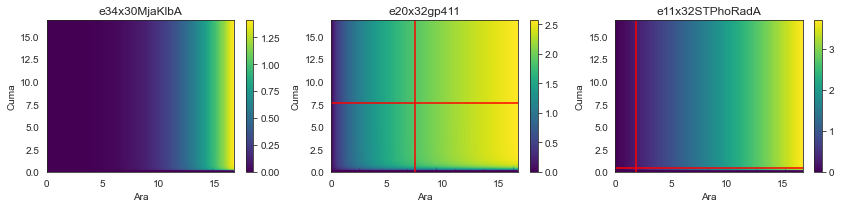

In [215]:
def plot_colormap(fluos, gates, num_row, num_col, ind1, ind2, hill_params):
    
    f, axs = plt.subplots(num_row, num_col, sharex=False, sharey=False, figsize=(num_col*4, num_row*3))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(gates):
            gate = gates[i]
            fluo = fluos[filter(lambda x: x.startswith(gate), fluos.index)]
            
            x1, x2 = np.meshgrid(ind1, ind2)
            x = np.vstack((x1.ravel(), x2.ravel()))
            y = fluo.values
            
            arr_ind1 = np.arange(0, 16.846887772258317, 0.1)
            arr_ind2 = np.arange(0, 16.846887772258317, 0.1)
            x1_, x2_ = np.meshgrid(arr_ind1, arr_ind2)
            x_ = np.vstack((x1_.ravel(), x2_.ravel()))
            y_pred_ = hill_activation_and(x_, *hill_params[gate])
            
            cf = ax.pcolormesh(x2_, x1_, y_pred_.reshape(-1, len(arr_ind1)), cmap='viridis')
            f.colorbar(cf, ax=ax)
            
            if gate=='e42x32STIMPDH1':
                ax.axhline(16.823954609817722, color='red')
                ax.axvline(11.974360213828955, color='red')
            elif gate=='e20x32gp411':
                ax.axhline(7.5950206097534565, color='red')
                ax.axvline(7.543994698752634, color='red')
            elif gate=='e11x32STPhoRadA':
                ax.axhline(0.4073604172225624, color='red')
                ax.axvline(1.878844175166119, color='red')
            
            ax.set_xlabel('Ara')
            ax.set_ylabel('Cuma')
            ax.set_title(gate)
        else:
            ax.set_visible(False)
    plt.tight_layout()
    plt.show()

selection = [5, 3, 0]
selected_gates = [gates[g] for g in selection]
circuit2 = Circuit3(selected_gates, [cuma_rpu[-1], rha_rpu[-1], ohc14_rpu[-1], ara_rpu[-1]])
output = signal_match(circuit2)
plot_colormap(rpus[selection], selected_gates, 1, 3, np.round(cumas_rpu, 2), np.round(aras_rpu, 2), hill_params)

0 e20x32gp411 16.823954609817722 11.974360213828955 2.2736487455239915
1 e11x32STPhoRadA 7.5950206097534565 7.543994698752634 1.4844461560653528
2 e38x32gp418 2.2736487455239915 1.4844461560653528 0.1900685711465318


<ipython-input-186-59b553a500a9>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(x2_, x1_, y_pred_.reshape(-1, len(arr_ind1)), cmap='viridis')


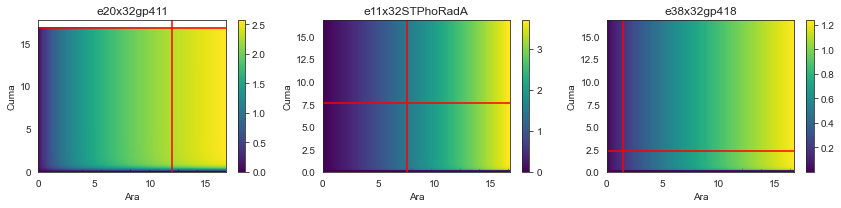

In [186]:
def plot_colormap(fluos, gates, num_row, num_col, ind1, ind2, hill_params):
    
    f, axs = plt.subplots(num_row, num_col, sharex=False, sharey=False, figsize=(num_col*4, num_row*3))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(gates):
            gate = gates[i]
            fluo = fluos[filter(lambda x: x.startswith(gate), fluos.index)]
            
            x1, x2 = np.meshgrid(ind1, ind2)
            x = np.vstack((x1.ravel(), x2.ravel()))
            y = fluo.values
            
            arr_ind1 = np.arange(0, 16.846887772258317, 0.1)
            arr_ind2 = np.arange(0, 16.846887772258317, 0.1)
            x1_, x2_ = np.meshgrid(arr_ind1, arr_ind2)
            x_ = np.vstack((x1_.ravel(), x2_.ravel()))
            y_pred_ = hill_activation_and(x_, *hill_params[gate])
            
            cf = ax.pcolormesh(x2_, x1_, y_pred_.reshape(-1, len(arr_ind1)), cmap='viridis')
            f.colorbar(cf, ax=ax)
            
            if gate=='e38x32gp418':
                ax.axhline(2.2736487455239915, color='red')
                ax.axvline(1.4844461560653528, color='red')
            elif gate=='e11x32STPhoRadA':
                ax.axhline(7.5950206097534565, color='red')
                ax.axvline(7.543994698752634, color='red')
            elif gate=='e20x32gp411':
                ax.axhline(16.823954609817722, color='red')
                ax.axvline(11.974360213828955, color='red')
            
            ax.set_xlabel('Ara')
            ax.set_ylabel('Cuma')
            ax.set_title(gate)
        else:
            ax.set_visible(False)
    plt.tight_layout()
    plt.show()

selection = [3, 0, 6]
selected_gates = [gates[g] for g in selection]
circuit2 = Circuit3(selected_gates, [ara_rpu[-1], rha_rpu[-1], sal_rpu[-1], ahl_rpu[-1]])
output = signal_match(circuit2)
plot_colormap(rpus[selection], selected_gates, 1, 3, np.round(cumas_rpu, 2), np.round(aras_rpu, 2), hill_params)

In [203]:
def initialPopulation(pop_size, num_indiv, length):
    population = []
    arrangement = np.arange(num_indiv)
    for i in range(pop_size):
        new_arrangement = [i for i in arrangement]
        np.random.shuffle(new_arrangement)
        population.append(new_arrangement[:length])
    return np.array(population)

def calculateFitness(pop):
    
    f_t = fluos.index
    fitness = []
    
    for i, p in enumerate(pop):
        #circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, p)
        #model = gate_wrapper2(f_t, circuit)
        #gfp = pd.Series(model[33], index=f_t/60)
        
        #print(p, [gates[g] for g in pop])
        outputs = []
        for a in range(0, -2, -1):
            for b in range(0, -2, -1):
                for c in range(0, -2, -1):
                    for d in range(0, -2, -1):
                        circuit = Circuit3([gates[g] for g in p], [cuma_rpu[a], ohc14_rpu[b], sal_rpu[c], ahl_rpu[d]])
                        #circuit2 = Circuit3([gates[g] for g in p], [cumas_rpu[0], aras_rpu[0], cumas_rpu[5], aras_rpu[5]])
                        #circuit2 = Circuit2([gates[g] for g in p], [cumas_rpu[3], aras_rpu[3]] * 4)
                        #model = gate_wrapper(fluos.index, circuit, 2)
                        #gfp = pd.Series(model[13], index=fluos.index/60)
                        #fitness.append(gfp.max()-gfp.min())
                        outputs.append(signal_match(circuit))
        on = outputs[-1]
        max_off = np.max(outputs[:-1])
        fitness.append(np.log(on/max_off))
    return np.array(fitness)

def rankIndiv(population):
    
    fitness = calculateFitness(population)
    fitnessResults = [(a, b) for a, b in zip(population, fitness)]
    return np.array(sorted(fitnessResults, key=lambda x: x[1], reverse=True))

def selection(popRanked, eliteSize):
    
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        selected = selectionResults[i]
        matingpool.append(selected)
    return matingpool

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    
    return child

def breedPopulation(matingpool, eliteSize, length):
    
    children = []
    nonElite = len(matingpool) - eliteSize
    pool = random.choices(matingpool, k=len(matingpool))

    for i in range(0, eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, nonElite):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child[:length])
    
    return np.array(children)

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return np.array(mutatedPop)

def nextGeneration(currentGen, eliteSize, mutationRate, length):
    
    popRanked = rankIndiv(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize, length)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithm(popSize, eliteSize, mutationRate, generations, candidates, length):
    pop = initialPopulation(popSize, candidates, length)
    pop_copy = [i for i in pop]
    
    for i in tqdm(range(0, generations)):
        pop = nextGeneration(pop, eliteSize, mutationRate, length)
    return pop_copy, rankIndiv(pop)

pop_copy, result = geneticAlgorithm(popSize=100, eliteSize=20, mutationRate=0.01, generations=20, candidates=len(gates), length=3)
result

  0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-203-3077d373e130>:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(sorted(fitnessResults, key=lambda x: x[1], reverse=True))
100%|██████████| 20/20 [00:02<00:00,  9.29it/s]


array([[array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878189431882],
       [array([5, 3, 0]), 6.298878

In [204]:
selected = [
    [5, 3, 0], [8, 3, 0], [7, 6, 0]
]

In [205]:
[gates[g] for s in selected for g in s]

['e34x30MjaKlbA',
 'e20x32gp411',
 'e11x32STPhoRadA',
 'e42x32STIMPDH1',
 'e20x32gp411',
 'e11x32STPhoRadA',
 'e41x32NrdJ1',
 'e38x32gp418',
 'e11x32STPhoRadA']

In [209]:
candidates = []
for r in selected:
    
    states = []
    for a in range(0, -2, -1):
        for b in range(0, -2, -1):
            for c in range(0, -2, -1):
                for d in range(0, -2, -1):
                    circuit2 = Circuit3([gates[g] for g in r], [cuma_rpu[a], ohc14_rpu[b], sal_rpu[c], ahl_rpu[d]])
                    states.append(signal_match(circuit2))
    candidates.append(states)

In [210]:
candidates[0]

[2.4088531287283784e-37,
 2.4088531287283784e-37,
 2.4088531298012386e-37,
 1.3103229911273452e-34,
 4.5813904500814005e-20,
 4.5813904500814005e-20,
 4.5813904521218697e-20,
 2.4920993175046426e-17,
 2.4088531287283784e-37,
 2.4088531287283784e-37,
 2.4088531298012386e-37,
 1.3103229911273452e-34,
 2.3519595794565897e-10,
 2.3519595794565897e-10,
 2.3519595805041105e-10,
 1.2793750994653013e-07]

1.2793750994653013e-07 543.9613461346494


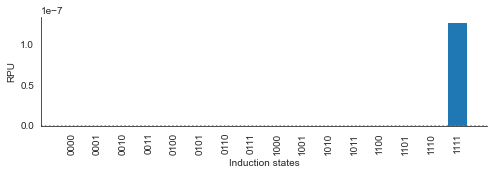

In [207]:
c = candidates[0]
plt.figure(figsize=[8, 2])
plt.bar(np.arange(16), c)
plt.axhline(0, linestyle='dotted', color='gray')
plt.ylabel('RPU')
plt.xlabel('Induction states')
#plt.yscale('log')
plt.xticks(np.arange(16), [format(x, "04b") for x in np.arange(16)], rotation=90)
#plt.xticklabels(np.arange(64), rotation=90)
print(c[-1], c[-1]/np.max(c[:-1]))
sns.despine()

270.8408051768979


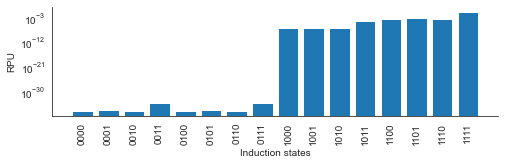

In [106]:
plt.figure(figsize=[8, 2])
plt.bar(np.arange(16), candidates[1])
plt.axhline(0, linestyle='dotted', color='gray')
plt.ylabel('RPU')
plt.xlabel('Induction states')
plt.yscale('log')
plt.xticks(np.arange(16), [format(x, "04b") for x in np.arange(16)], rotation=90)

print(candidates[1][-1]/np.max(candidates[1][:-1]))
#plt.xticklabels(np.arange(64), rotation=90)
sns.despine()

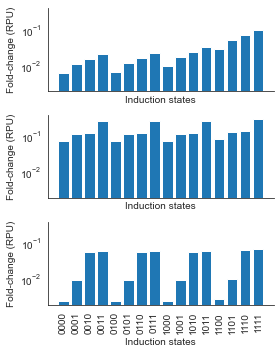

In [79]:
f, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(4, 5))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i<len(candidates):
        ax.bar(np.arange(16), candidates[i])
        ax.set_ylabel('Fold-change (RPU)')
        ax.set_xlabel('Induction states')
        ax.set_yscale('log')
        ax.set_xticks(np.arange(16))
        ax.set_xticklabels([format(x, "04b") for x in np.arange(16)], rotation=90)
    else:
        ax.set_visible(False)
    sns.despine()
plt.tight_layout()

#### Layering the Gates

In [ ]:
class Gate:
    def __init__(self, name, gate_params, hill_params, num_states, num_params):
        
        #metadata
        self.name = name
        self.num_states = num_states
        self.num_params = num_params
        
        #parameters
        self.r = gate_params[0]
        self.y0 = gate_params[1]
        self.synGFP = gate_params[2]
        self.degGFP = gate_params[3]
        self.K1 = hill_params[0]
        self.K2 = hill_params[1]
        self.n1 = hill_params[2]
        self.n2 = hill_params[3]
        self.ymin1 = hill_params[4]
        self.ymin2 = hill_params[5]
        self.ymax1 = hill_params[6]
        self.ymax2 = hill_params[7]
        
        #initial states
        self.y = self.y0
        self.GFP = 0
        
        #derivative states
        self.dy = 0
        self.dGFP = 0
        
        #connection
        self.connection = None
        
    def get_params(self):
        return [self.r, self.y0, self.syn_GFP, self.deg_GFP]
    
    def get_init_states(self):
        return [self.y, self.GFP]
    
class Connection:
    def __init__(self, name, input1, input2, output, level, index, input1_idx, input2_idx, output_idx):
        
        self.name = name
        self.index = index
        self.level = level #0: input, 1: intermediate, 2:output
        
        self.input1 = input1
        self.input2 = input2
        self.output = output
        
        self.input1_idx = input1_idx
        self.input2_idx = input2_idx
        self.output_idx = output_idx
         
class Circuit:
    def __init__(self, arrangement, inducers):
        
        #inducers
        self.inducers = inducers
        
        #gate
        self.gates = []
        for arr in arrangement:
            self.gates.append(Gate(arr, gate_params[arr], hill_params[arr], 2, 11))
        
        self.connections = [
            Connection('c1', self.inducers[0], self.inducers[1], None, 0, 0, 0, 1, 4),
            Connection('c2', self.inducers[2], self.inducers[3], None, 0, 1, 2, 3, 4),
            Connection('c3', self.inducers[4], self.inducers[5], None, 0, 4, 0, 1, 6),
            Connection('c4', self.inducers[6], self.inducers[7], None, 0, 3, 6, 7, 5),
            Connection('c5', self.gates[0], self.gates[1], None, 1, 4, 0, 1, 6),
            Connection('c6', self.gates[2], self.gates[3], None, 1, 5, 2, 3, 6),
            Connection('c7', self.gates[4], self.gates[5], None, 2, 6, 4, 5, 6)
        ]
        
        for i, g in enumerate(self.gates):
            g.connection = self.connections[i]

    def get_all_params(self):
        params = []
        for g in self.gates:
            params.append(g.get_params())
        return np.array(params)
    
    def get_all_init_states(self):
        init_states = []
        for g in self.gates:
            init_states.append(g.get_init_states())
        return np.array(init_states)

In [ ]:
def hill_activation(x, K, n, ymin, ymax):
    return  ymin + (ymax - ymin) * (x**n / (K**n + x**n))

def hill_activation_and(x, K1, K2, n1, n2, ymin1, ymin2, ymax1, ymax2):
    x1, x2 = x
    return hill_activation(x1, K1, n1, ymin1, ymax1) * hill_activation(x2, K2, n2, ymin2, ymax2)

def gate_wrapper(t, circuit, num_states):
    
    y0 = np.array([g.get_init_states() for g in circuit.gates]).ravel()
    
    def gate_model(y, t):
        
        yi = np.reshape(y, (-1, num_states))
        yn = []

        for i, g in enumerate(circuit.gates):
            
            g.y, g.GFP = yi[i]
            
            #level 0 (input)
            if g.connection.level==0:
                
                ymax = hill_activation_and((circuit.inducers[i*2], circuit.inducers[(i*2)+1]), g.K1, g.K2, g.n1, g.n2, g.ymin1, g.ymin2, g.ymax1, g.ymax2)
                #print(i, ymax)
                g.dy = g.r * (1 - (g.y/ymax)) * g.y
                yn.append([g.dy, g.dGFP])
                
            #level 1 (middle)
            elif g.connection.level==1:

                input1 = g.connection.input1
                input2 = g.connection.input2
                ymax = hill_activation_and((input1.y, input2.y), g.K1, g.K2, g.n1, g.n2, g.ymin1, g.ymin2, g.ymax1, g.ymax2)
                g.dy = g.r * (1 - (g.y/ymax)) * g.y
                #g.dGFP = g.synGFP * g.y - g.degGFP * g.GFP
                yn.append([g.dy, g.dGFP])
                
            #level 2 (output)
            elif g.connection.level==2:
                
                input1 = g.connection.input1
                input2 = g.connection.input2
                ymax = hill_activation_and((input1.y, input2.y), g.K1, g.K2, g.n1, g.n2, g.ymin1, g.ymin2, g.ymax1, g.ymax2)
                g.dy = g.r * (1 - (g.y/ymax)) * g.y
                g.dGFP = g.synGFP * g.y - g.degGFP * g.GFP
                yn.append([g.dy, g.dGFP])
        
        return np.array(yn).ravel()
    
    solution = odeint(gate_model, y0, t)
    return solution.transpose()

In [ ]:
def initialPopulation(pop_size, num_indiv, length):
    population = []
    arrangement = np.arange(num_indiv)
    for i in range(pop_size):
        new_arrangement = [i for i in arrangement]
        np.random.shuffle(new_arrangement)
        population.append(new_arrangement[:length])
    return np.array(population)

def calculateFitness(pop):
    
    f_t = fluos.index
    fitness = []
    
    for i, p in enumerate(pop):
        
        #circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, p)
        #model = gate_wrapper2(f_t, circuit)
        #gfp = pd.Series(model[33], index=f_t/60)

        circuit = Circuit(gates[:7], [cumas_rpu[5], aras_rpu[5]] * 4)
        model = gate_wrapper(fluos.index, circuit, 2)
        gfp = pd.Series(model[13], index=fluos.index/60)

        fitness.append(gfp.max()-gfp.min())
    return np.array(fitness)

def rankIndiv(population):
    
    fitness = calculateFitness(population)
    fitnessResults = [(a, b) for a, b in zip(population, fitness)]
    return np.array(sorted(fitnessResults, key=lambda x: x[1], reverse=True))

def selection(popRanked, eliteSize):
    
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        selected = selectionResults[i]
        matingpool.append(selected)
    return matingpool

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    
    return child

def breedPopulation(matingpool, eliteSize, length):
    
    children = []
    nonElite = len(matingpool) - eliteSize
    pool = random.choices(matingpool, k=len(matingpool))

    for i in range(0, eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, nonElite):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child[:length])
    
    return np.array(children)

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return np.array(mutatedPop)

def nextGeneration(currentGen, eliteSize, mutationRate, length):
    
    popRanked = rankIndiv(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize, length)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithm(popSize, eliteSize, mutationRate, generations, candidates, length):
    pop = initialPopulation(popSize, candidates, length)
    pop_copy = [i for i in pop]
    
    for i in tqdm(range(0, generations)):
        pop = nextGeneration(pop, eliteSize, mutationRate, length)
    return pop_copy, rankIndiv(pop)

pop_copy, result = geneticAlgorithm(popSize=100, eliteSize=20, mutationRate=0.01, generations=20, candidates=len(gates), length=7)
result

In [ ]:
#selected_gates = [4, 0, 3, 5, 2, 6, 1]
[gates[g] for g in result[0][0]]

In [ ]:
#point
fig = plt.figure(figsize=(5, 4))
for i in range(6):
    circuit = Circuit([gates[g] for g in selected_gates], [cumas[i], aras[i]] * 4)
    model = gate_wrapper(fluos.index, circuit, 2)
    pd.Series(model[13], index=fluos.index/60, name='cuma={}, ara={}'.format(cumas[i], aras[i])).plot()
plt.legend()
sns.despine()

In [ ]:
#interval
fig = plt.figure(figsize=(5, 4))
for i in range(6):
    circuit2 = Circuit([gates[g] for g in result[0][0]], [cumas[i], aras[i]] * 4)
    model = gate_wrapper(fluos.index, circuit2, 2)
    pd.Series(model[13], index=fluos.index/60, name='cuma={}, ara={}'.format(cumas[i], aras[i])).plot()
plt.legend()
sns.despine()

In [ ]:
circuit1 = Circuit([gates[g] for g in selected_gates], [cumas[5], aras[5]] * 4)
model = gate_wrapper(fluos.index, circuit1, 2)
for i, m in enumerate(model):
    if i%2==0:
        pd.Series(m, index=fluos.index/60, name=i).plot()
plt.legend()
sns.despine()

In [ ]:
circuit2 = Circuit2([gates[g] for g in result[0][0]], [cumas[5], aras[5]] * 4)
signal_match(circuit2)

In [ ]:
circuit2 = Circuit2([gates[g] for g in result[0][0]], [cumas[1], aras[1]] * 4)
signal_match(circuit2)

In [ ]:
cumas_rpu, aras_rpu

In [ ]:
circuit2 = Circuit2([gates[g] for g in [0, 2, 3, 8, 5, 6, 7]], [cumas_rpu[4], aras_rpu[4]] * 4)
signal_match(circuit2)

In [ ]:
circuit2 = Circuit2([gates[g] for g in [1, 2, 3, 4, 5, 6, 7]], [cumas_rpu[5], aras_rpu[5]] * 4)
signal_match(circuit2)

In [ ]:
def initialPopulation(pop_size, num_indiv, length):
    population = []
    arrangement = np.arange(num_indiv)
    for i in range(pop_size):
        new_arrangement = [i for i in arrangement]
        np.random.shuffle(new_arrangement)
        population.append(new_arrangement[:length])
    return np.array(population)

def calculateFitness(pop):
    
    f_t = fluos.index
    fitness = []
    
    for i, p in enumerate(pop):
        #circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, p)
        #model = gate_wrapper2(f_t, circuit)
        #gfp = pd.Series(model[33], index=f_t/60)
        
        circuit = Circuit(gates[:7], [cumas[5], aras[5]] * 4)
        #model = gate_wrapper(fluos.index, circuit, 2)
        #gfp = pd.Series(model[13], index=fluos.index/60)
        #fitness.append(gfp.max()-gfp.min())
        gfp = signal_match(circuit)
        fitness.append(gfp)
    return np.array(fitness)

def rankIndiv(population):
    
    fitness = calculateFitness(population)
    fitnessResults = [(a, b) for a, b in zip(population, fitness)]
    return np.array(sorted(fitnessResults, key=lambda x: x[1], reverse=True))

def selection(popRanked, eliteSize):
    
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        selected = selectionResults[i]
        matingpool.append(selected)
    return matingpool

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    
    return child

def breedPopulation(matingpool, eliteSize, length):
    
    children = []
    nonElite = len(matingpool) - eliteSize
    pool = random.choices(matingpool, k=len(matingpool))

    for i in range(0, eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, nonElite):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child[:length])
    
    return np.array(children)

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return np.array(mutatedPop)

def nextGeneration(currentGen, eliteSize, mutationRate, length):
    
    popRanked = rankIndiv(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize, length)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithm(popSize, eliteSize, mutationRate, generations, candidates, length):
    pop = initialPopulation(popSize, candidates, length)
    pop_copy = [i for i in pop]
    
    for i in tqdm(range(0, generations)):
        pop = nextGeneration(pop, eliteSize, mutationRate, length)
    return pop_copy, rankIndiv(pop)

pop_copy, result = geneticAlgorithm(popSize=100, eliteSize=20, mutationRate=0.01, generations=20, candidates=len(gates), length=7)
result

In [ ]:
#hill function
fig = plt.figure(figsize=(5, 4))
for i in range(6):
    circuit2 = Circuit([gates[g] for g in [1, 2, 3, 4, 5, 6, 7]], [cumas[i], aras[i]] * 4)
    model = gate_wrapper(fluos.index, circuit2, 2)
    pd.Series(model[13], index=fluos.index/60, name='cuma={}, ara={}'.format(cumas[i], aras[i])).plot()
plt.legend()
sns.despine()

### Exhaustive Search

In [ ]:
gate_params_selected = [par['Value'] for par in f_df_deg]
all_arr = [list(a) for a in list(itertools.permutations(np.arange(len(gate_params_selected)), 7))]
len(all_arr)

In [ ]:
gate_params_selected = [par['Value'] for par in f_df_deg]
#arr = np.arange(len(gate_params_selected))
#np.random.shuffle(arr)
#print(arr)
f_t = fluo_selected.index

results = []
for i, arr in enumerate(tqdm(all_arr)):
    circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, arr)
    model = gate_wrapper2(f_t, circuit)
    gfp = pd.Series(model[33], index=f_t/60)
    dyn = gfp.max() - gfp.min()
    results.append((dyn, arr))

In [ ]:
best_results = sorted(results, reverse=True)[:10]
print('Best result', best_results[0][0])
for i, res in enumerate(tqdm(best_results)):
    circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, res[1])
    model = gate_wrapper2(f_t, circuit)
    gfp = pd.Series(model[33], index=f_t/60)
    plt.plot(gfp, label= res[1])
plt.legend(bbox_to_anchor=(1.05, 1), ncol=2)
sns.despine()
plt.show()

In [ ]:
gate_params_selected = [par['Value'] for par in f_df_deg]
ga_arrangement = result[0][0]
print(ga_arrangement)

f_t = fluo_selected.index
for ar in pop_copy[:1]:

    circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, ga_arrangement)
    model = gate_wrapper2(f_t, circuit)
    gfp = pd.Series(model[33], index=f_t/60)
    print(gfp.max()-gfp.min())
    plt.plot(gfp, label=ga_arrangement)
plt.legend(bbox_to_anchor=(1.05, 1), ncol=2)
sns.despine()
plt.show()

In [ ]:
final_asg = fluo_selected[[fluo_selected.columns[j] for j in ga_arrangement]]
num_col = 7
num_row = 1
f, axs = plt.subplots(num_row, num_col, sharex=True, sharey=True, figsize=(14, num_row*2))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < num_traces:
        ax.plot(final_asg.index / 60, final_asg.iloc[:, i])
        ax.set_title(final_asg.columns[i])
        ax.set_xlabel('Time (h)')
    else:
        ax.set_visible(False)
plt.tight_layout()
sns.despine()

In [ ]:
def geneticAlgorithmPlot(pop_copy, popSize, eliteSize, mutationRate, generations, candidates, length):
    pop = [i for i in pop_copy]
    progress = []
    progress.append(rankIndiv(pop)[0][1])
    
    for i in tqdm(range(0, generations)):
        pop = nextGeneration(pop, eliteSize, mutationRate, length)
        progress.append(rankIndiv(pop)[0][1])
    return progress
    
progress = geneticAlgorithmPlot(pop_copy, popSize=100, eliteSize=20, mutationRate=0.01, generations=20, candidates=len(selected), length=7)
plt.figure(figsize=[6, 4])
plt.plot(progress[:20])
plt.ylabel('Dynamic Range')
plt.xlabel('Generation')
sns.despine()
plt.show()

In [ ]:
circuit = Circuit(gates[:7], [cumas[2], aras[2]] * 4)
model = gate_wrapper(fluos.index, circuit, 2)
gfp = pd.Series(model[13], index=fluos.index/60)